In [1]:
import os
import gc
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

# 1.) Get all image path sets
cardboard = ['C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/cardboard/{}'.format(i) for i in os.listdir('C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/cardboard') if 'cardboard' in i]
glass = ['C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/glass/{}'.format(i) for i in os.listdir('C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/glass') if 'glass' in i]
metal = ['C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/metal/{}'.format(i) for i in os.listdir('C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/metal') if 'metal' in i]
paper = ['C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/paper/{}'.format(i) for i in os.listdir('C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/paper') if 'paper' in i]
plastic = ['C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/plastic/{}'.format(i) for i in os.listdir('C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/plastic') if 'plastic' in i]
trash = ['C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/trash/{}'.format(i) for i in os.listdir('C:/Users/user/Desktop/trash/Garbage_classification/Garbage_classification/trash') if 'trash' in i]

# 2.) Randomly Shuffle Images Before Splitting for Training and Testing
random.shuffle(cardboard)
random.shuffle(glass)
random.shuffle(metal)
random.shuffle(paper)
random.shuffle(plastic)
random.shuffle(trash)


# 3.) Training and Testing Image Sets
train_set = cardboard[:300] + glass[:375] + metal[:300] + paper[:450] + plastic[:360] + trash[:100]
test_set = cardboard[300:] + glass[375:] + metal[300:] + paper[450:] + plastic[360:] + trash[100:]

# 4.) Garbage Collection
del cardboard, glass, metal, paper, plastic, trash
gc.collect()

Using TensorFlow backend.


22

In [2]:
# 5.) Image Pre-Processing
nRows = 150  # Width
nCols = 150  # Height
channels = 3  # Color Channels RGB-3, Grayscale-1

# 6.) Training and Testing Set Labeling
X_train = []
X_test = []
y_train = []
y_test = []

# 7.) Read and Label Each Image in the Training Set
for image in train_set:
    try:
        X_train.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nRows, nCols), interpolation=cv2.INTER_CUBIC))
        if 'cardboard' in image:
            y_train.append(1)
        elif 'glass' in image:
            y_train.append(2)
        elif 'metal' in image:
            y_train.append(3)
        elif 'paper' in image:
            y_train.append(4)
        elif 'plastic' in image:
            y_train.append(5)
        elif 'trash' in image:
            y_train.append(6)
    except Exception:
        print('Failed to format: ', image)

# 8.) Read and Label Each Image in the Testing Set
for image in test_set:
    try:
        X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nRows, nCols), interpolation=cv2.INTER_CUBIC))
        if 'cardboard' in image:
            y_test.append(1)
        elif 'glass' in image:
            y_test.append(2)
        elif 'metal' in image:
            y_test.append(3)
        elif 'paper' in image:
            y_test.append(4)
        elif 'plastic' in image:
            y_test.append(5)
        elif 'trash' in image:
            y_test.append(6)
    except Exception:
        print('Failed to format: ', image)

# 9.) Garbage Collection
del train_set, test_set
gc.collect()

# 10.) Convert to Numpy Arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 11.) Switch Targets to Categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
#ResNet
from keras.applications import ResNet50
from keras.layers import Dense, Input, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

input = Input(shape=(nRows, nCols, channels))
model = ResNet50(input_tensor=input, include_top=False, weights=None, pooling='max')
 
x = model.output
x = Dense(1024, name='fully', init='uniform')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Activation('relu')(x)
x = Dense(512, init='uniform')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Activation('relu')(x)
x = Dense(7, activation='sigmoid', name='sigmoid')(x)

model = Model(model.input, x)
'''
#CNN
# 12.) Convolutional Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(nRows, nCols, channels)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
'''

# 13.) Model Summary
print(model.summary())

# 14.) Compile and Train the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



C:\Users\user\anaconda\envs\test\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1024, name="fully", kernel_initializer="uniform")`
  
C:\Users\user\anaconda\envs\test\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="uniform")`


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 75, 75, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1885 samples, validate on 642 samples
Epoch 1/10
1885/1885 [==============================] - 1884s 1000ms/step - loss: 1.7478 - accuracy: 0.2589 - val_loss: 7.7210 - val_accuracy: 0.1604
Epoch 2/10
1885/1885 [==============================] - 1925s 1s/step - loss: 1.4869 - accuracy: 0.3963 - val_loss: 6.9078 - val_accuracy: 0.1012
Epoch 3/10
1885/1885 [==============================] - 1920s 1s/step - loss: 1.3157 - accuracy: 0.4955 - val_loss: 3.1175 - val_accuracy: 0.2274
Epoch 4/10
1885/1885 [==============================] - 1922s 1s/step - loss: 1.1571 - accuracy: 0.5517 - val_loss: 1.4064 - val_accuracy: 0.3723
Epoch 5/10
1885/1885 [==============================] - 1822s 967ms/step - loss: 1.1645 - accuracy: 0.5634 - val_loss: 1.8062 - val_accuracy: 0.4517
Epoch 6/10
1885/1885 [==============================] - 1919s 1s/step - loss: 0.9702 - accuracy: 0.6456 - val_loss: 2.367

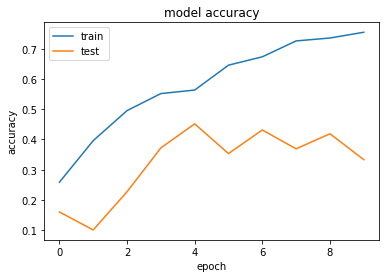

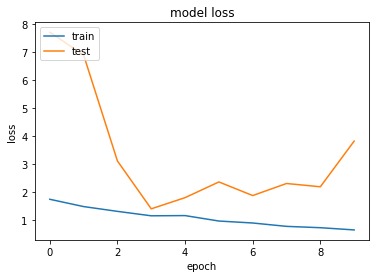

In [4]:
# 15.) Plot Accuracy Over Training Period
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 16.) Plot Loss Over Training Period
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()